# Language Processing

Here, we will study publicly available book texts, including translations in multiple languages, in order to develop tools that count the frequency of words and compares distributions across languages.


In [6]:
def count_words(text):
    """Count words in a string of text, after converting to lowercase and removing punctuation."""
    text = text.lower()
    punctuation = [".", ",", "!", "?", "'", '"', ":", ";", ")", "("]
    for ch in punctuation:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

In [7]:
from collections import Counter
def count_words_fast(text):
    """Count words in a string of text, after converting to lowercase and removing punctuation.
    Based on the Counter object from the collections module."""
    text = text.lower()
    punctuation = [".", ",", "!", "?", "'", '"', ":", ";", ")", "("]
    for ch in punctuation:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

In [8]:
def read_book(title_path):
    """Read a book and return it as a string."""
    with open(title_path, "r", encoding="utf8") as f:
        text = f.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [10]:
# read in example
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
len(text)

169275

In [12]:
# find a given line
ind = text.find("What's in a name?")
text[ind:ind+1000]

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [14]:
def word_stats(word_counts):
    """Count the number of unique words and the frequency of each word in a dictionary."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [19]:
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print(num_unique)
sum(counts)

4633


40776

In [20]:
# Compare to German
text_ger = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
word_counts_ger = count_words(text_ger)
(num_unique, counts) = word_stats(word_counts_ger)
print(num_unique)
sum(counts)

7284


20311

In [36]:
# Reading multiple files:
import pandas as pd
import os
book_dir = "./Books"
stats = pd.DataFrame(columns = ["language", "author", "title", "length", "unique"])

# loop over all languages, authors, and books
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            title = title.replace(".txt", "")
            author = author.capitalize()
            stats.loc[title_num] = language, author, title, sum(counts), num_unique
            title_num += 1

In [37]:
stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5039
...,...,...,...,...,...
98,Portuguese,Queir┬ós,O crime do padre Amaro,128630,28223
99,Portuguese,Queir┬ós,O Mandarim,21440,7732
100,Portuguese,Queir┬ós,O Primo Bazilio,107303,26563
101,Portuguese,Queir┬ós,Os Maias,195771,39269


In [38]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5039


In [39]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir┬ós,O crime do padre Amaro,128630,28223
99,Portuguese,Queir┬ós,O Mandarim,21440,7732
100,Portuguese,Queir┬ós,O Primo Bazilio,107303,26563
101,Portuguese,Queir┬ós,Os Maias,195771,39269
102,Portuguese,Shakespeare,Hamlet,30567,9397


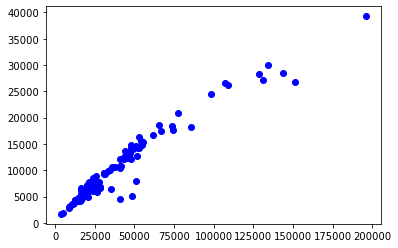

In [40]:
# Plotting book statistics
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique, "bo")

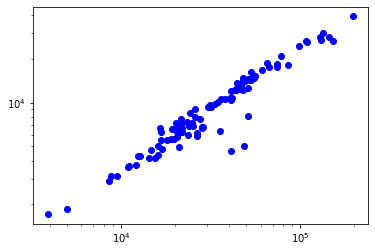

In [41]:
plt.loglog(stats.length, stats.unique, "bo")

In [43]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5039
6,English,Shakespeare,Romeo and Juliet,40776,4633
7,English,Shakespeare,The Merchant of Venice,20949,4978


Text(0, 0.5, 'Number of Unique Words')

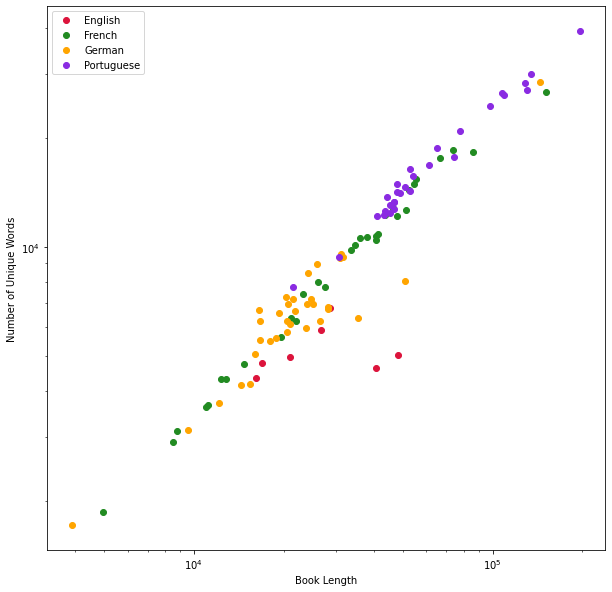

In [44]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words")